In [106]:
import pandas as pd
from sodapy import Socrata
import os
import numpy as np
import sqlalchemy as sa
from sqlalchemy import create_engine, text

pd.set_option('display.max_columns', None)

In [107]:
# The Host Name for the API endpoint (the https:// part will be added automatically)
data_url = 'data.cityofnewyork.us'    
# The data set at the API endpoint (311 data in this case)
data_set = 'erm2-nwe9'
# The app token created in the prior steps
app_token = 'kLUfNhl5SOgSzVFOKRG7nWfxZ'  
# Create the client to point to the API endpoint
client = Socrata(data_url,app_token)      
# Set the timeout to 60 seconds    
client.timeout = 6000

In [108]:
NYC_DATA_311 = "erm2-nwe9"
NYC_DATA_TREES = "5rq2-4hqu"

## Part 1: Data Preprocessing

### Download Dataset

In [109]:
directory = 'data'
# check is exist
if not os.path.exists(directory):
    # no exist then mkdir
    os.makedirs(directory)

Programmatically download 311 complaint and tree data

In [223]:
# 311 Data  
file1_name = 'my_311_data.csv'
directory='./data'
file1_path = os.path.join(directory, file1_name)

# Check file is exists
if not os.path.exists(file1_path):
    results1 = client.get(NYC_DATA_311,limit=1500000)
    df1 = pd.DataFrame.from_records(results1)
    file1_name='my_311_data.csv'
    df1.to_csv(f'{directory}/{file1_name}', index=False)
else:
    print(f'The file {file1_name} already exists in the directory {directory}.')

The file my_311_data.csv already exists in the directory ./data.


In [224]:
# Tree Data 
file1_name = 'my_trees_data.csv'
directory='./data'
file1_path = os.path.join(directory, file1_name)

if not os.path.exists(file1_path):
    results2 = client.get(NYC_DATA_TREES,limit=1500000)
    df2 = pd.DataFrame.from_records(results2)
    file2_name='my_trees_data.csv'
    df2.to_csv(f'{directory}/{file2_name}', index=False)
else:
    print(f'The file {file1_name} already exists in the directory {directory}.')

The file my_trees_data.csv already exists in the directory ./data.


### 311 complaints

In [112]:
# load complaints data 
data1 = pd.read_csv('./data/my_311_data.csv',low_memory=False)

In [113]:
data1.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_7mpf_4k6g,facility_type,due_date,intersection_street_1,intersection_street_2,landmark,vehicle_type,taxi_company_borough,taxi_pick_up_location,closed_date,bridge_highway_name,bridge_highway_direction,bridge_highway_segment,road_ramp
0,59682706,2023-12-09T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11412.0,114-03 197 STREET,197 STREET,MURDOCK AVENUE,115 AVENUE,ADDRESS,SAINT ALBANS,Open,If the abandoned vehicle meets the criteria to...,2023-12-09T12:00:00.000,12 QUEENS,4.110140e+09,QUEENS,1051577.0,194027.0,PHONE,Unspecified,QUEENS,40.698980,-73.757192,"{'latitude': '40.69897994741009', 'longitude':...",15312.0,41.0,3.0,6.0,71.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59681385,2023-12-09T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11222.0,452 MEEKER AVENUE,MEEKER AVENUE,RICHARDSON STREET,GRAHAM AVENUE,ADDRESS,BROOKLYN,Open,If the abandoned vehicle meets the criteria to...,2023-12-09T12:00:00.000,01 BROOKLYN,3.027250e+09,BROOKLYN,999359.0,201282.0,PHONE,Unspecified,BROOKLYN,40.719136,-73.945494,"{'latitude': '40.71913641790782', 'longitude':...",18182.0,36.0,2.0,30.0,57.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59683999,2023-12-09T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11357.0,143-38 22 AVENUE,22 AVENUE,WHITESTONE EXPRESSWAY,144 STREET,ADDRESS,WHITESTONE,Open,If the abandoned vehicle meets the criteria to...,2023-12-09T12:00:00.000,07 QUEENS,4.042200e+09,QUEENS,1032666.0,223341.0,PHONE,Unspecified,QUEENS,40.779563,-73.825181,"{'latitude': '40.779563107109084', 'longitude'...",14192.0,22.0,3.0,20.0,67.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59681790,2023-12-09T02:41:46.000,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10032.0,603 WEST 161 STREET,WEST 161 STREET,NaN,NaN,ADDRESS,NEW YORK,Open,The graffiti on this property has been schedul...,2023-12-09T02:41:46.000,12 MANHATTAN,1.021370e+09,MANHATTAN,999919.0,244116.0,UNKNOWN,Unspecified,MANHATTAN,40.836703,-73.943374,"{'latitude': '40.83670343588696', 'longitude':...",13090.0,47.0,4.0,23.0,21.0,21.0,NaN,2024-01-08T02:41:46.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59684401,2023-12-09T02:06:35.000,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,11211.0,436 UNION AVENUE,UNION AVENUE,NaN,NaN,ADDRESS,BROOKLYN,Open,The graffiti has been reported. The property o...,2023-12-09T02:06:35.000,01 BROOKLYN,3.027610e+09,BROOKLYN,997692.0,199196.0,UNKNOWN,Unspecified,BROOKLYN,40.713414,-73.951512,"{'latitude': '40.71341353837136', 'longitude':...",17613.0,36.0,2.0,30.0,56.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# data1.isnull().sum()

In [115]:
print(data1.columns.tolist())

['unique_key', 'created_date', 'agency', 'agency_name', 'complaint_type', 'descriptor', 'location_type', 'incident_zip', 'incident_address', 'street_name', 'cross_street_1', 'cross_street_2', 'address_type', 'city', 'status', 'resolution_description', 'resolution_action_updated_date', 'community_board', 'bbl', 'borough', 'x_coordinate_state_plane', 'y_coordinate_state_plane', 'open_data_channel_type', 'park_facility_name', 'park_borough', 'latitude', 'longitude', 'location', ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih', ':@computed_region_7mpf_4k6g', 'facility_type', 'due_date', 'intersection_street_1', 'intersection_street_2', 'landmark', 'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location', 'closed_date', 'bridge_highway_name', 'bridge_highway_direction', 'bridge_highway_segment', 'road_ramp']


Drop unnecessary columns

In [116]:
data1 = data1.drop(columns=[':@computed_region_f5dn_yrer',":@computed_region_yeji_bk3q",":@computed_region_92fq_4b7q",":@computed_region_sbqj_enih",":@computed_region_7mpf_4k6g","bridge_highway_name","bridge_highway_direction","bridge_highway_segment","vehicle_type","facility_type","taxi_pick_up_location","road_ramp","due_date",
                            ":@computed_region_efsh_h5xi",":@computed_region_efsh_h5xi",":@computed_region_f5dn_yrer",'landmark','closed_date','intersection_street_1','intersection_street_2','location','resolution_description','bbl','resolution_action_updated_date','borough','open_data_channel_type',
                            'park_facility_name','park_borough','agency','agency_name','descriptor','address_type','community_board','status','cross_street_1','cross_street_2','x_coordinate_state_plane','y_coordinate_state_plane','incident_address','street_name'
                           ])

#### Column astype (Remove invalid data, column normalization, appropriate column data types)

In [117]:
# created_date
data1['created_date'] = pd.to_datetime(data1['created_date'])

In [118]:
# incident_zip
data1['incident_zip'] = data1['incident_zip'].replace([np.nan, np.inf, -np.inf], -1)
data1['incident_zip'] = data1['incident_zip'].astype(int)

In [119]:
data1['geom'] = data1.apply(lambda row: f'POINT({row["latitude"]} {row["longitude"]})', axis=1)
data1.drop(columns=['latitude','longitude'],inplace=True)

In [120]:
data1.head()

,unique_key,created_date,complaint_type,location_type,incident_zip,city,taxi_company_borough,geom
0,59682706,2023-12-09 12:00:00,Derelict Vehicles,Street,11412,SAINT ALBANS,NaN,POINT(40.69897994741009 -73.757191809592)
1,59681385,2023-12-09 12:00:00,Derelict Vehicles,Street,11222,BROOKLYN,NaN,POINT(40.71913641790782 -73.94549446766062)
2,59683999,2023-12-09 12:00:00,Derelict Vehicles,Street,11357,WHITESTONE,NaN,POINT(40.77956310710909 -73.82518126884483)
3,59681790,2023-12-09 02:41:46,Graffiti,Comercial,10032,NEW YORK,NaN,POINT(40.83670343588696 -73.94337438646215)
4,59684401,2023-12-09 02:06:35,Graffiti,Residential,11211,BROOKLYN,NaN,POINT(40.71341353837136 -73.95151231386045)


### Tree data

In [121]:
data2 = pd.read_csv('data/my_trees_data.csv')

In [122]:
data2.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,"{'type': 'Point', 'coordinates': [-73.84421521...",3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,"{'type': 'Point', 'coordinates': [-73.81867945...",21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,"{'type': 'Point', 'coordinates': [-73.93660770...",3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,"{'type': 'Point', 'coordinates': [-73.93445615...",10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,"{'type': 'Point', 'coordinates': [-73.97597938...",21,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999


Drop unnecessary columns

In [123]:
data2 = data2.drop(columns=['block_id','the_geom','tree_dbh','stump_diam','curb_loc','spc_common','steward','guards',
                            'sidewalk','user_type','root_stone','root_grate','root_other','trnk_wire','trnk_light','brnch_shoe',
                            'brnch_othe','address','cb_num','borocode','boroname','cncldist','st_assem','st_senate','nta','nta_name',
                            'boro_ct','x_sp','y_sp','trnk_other','brnch_ligh'])

#### Column astype (Remove invalid data, column normalization, appropriate column data types)

In [124]:
data2['geom'] = data2.apply(lambda row: f'POINT({row["latitude"]} {row["longitude"]})', axis=1)
data2.drop(columns=['latitude','longitude'],inplace=True)

In [125]:
data2.head()

,created_at,tree_id,status,health,spc_latin,problems,zipcode,zip_city,state,geom
0,08/27/2015,180683,Alive,Fair,Acer rubrum,NaN,11375,Forest Hills,New York,POINT(40.72309177 -73.84421522)
1,09/03/2015,200540,Alive,Fair,Quercus palustris,Stones,11357,Whitestone,New York,POINT(40.79411067 -73.81867946)
2,09/05/2015,204026,Alive,Good,Gleditsia triacanthos var. inermis,NaN,11211,Brooklyn,New York,POINT(40.71758074 -73.9366077)
3,09/05/2015,204337,Alive,Good,Gleditsia triacanthos var. inermis,Stones,11211,Brooklyn,New York,POINT(40.71353749 -73.93445616)
4,08/30/2015,189565,Alive,Good,Tilia americana,Stones,11215,Brooklyn,New York,POINT(40.66677776 -73.97597938)


### Zillow rent (manual updata)

In [126]:
data3 = pd.read_csv('/Users/apple/2023 Fall 4501/Project/data/Zillow_rent_data.csv')

In [127]:
data3.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1606.206406,1612.779844,1622.201575,1630.392427,1632.411500,1636.206864,1644.894632,1643.390762,1636.971443,1620.756709,1613.330035,1595.875303,1587.956334,1571.722899,1580.226011,1577.360511,1575.019249,1570.437252,1560.570981,1559.473860,1550.038637,1532.579831,1510.242213,1486.489733,1507.802059,1533.972404,1560.775400,1560.921517,1569.898260,1578.146822,1578.913743,1567.921730,1577.355514,1590.264504,1606.499320,1604.421318,1611.899807,1618.293318,1621.761808,1617.780728,1614.801931,1615.532634,1611.448067,1601.793861,1590.638710,1590.488945,1594.393947,1598.275260,1604.520456,1610.434841,1621.770680,1625.351916,1626.773326,1625.936662,1624.890088,1633.134397,1625.910897,1629.721928,1626.974655,1636.612419,1640.770934,1647.007094,1651.109647,1657.091010,1649.138584,1645.635867,1637.868714,1649.266605,1662.133844,1665.130638,1674.053593,1679.239150,1688.863037,1690.829750,1692.870693,1713.964591,1744.244031,1792.325270,1827.718052,1856.436987,1872.532636,1884.990347,1910.473392,1917.549543,1930.611286,1926.224851,1936.273593,1950.552503,1975.971322,1999.610405,2023.300973,2024.379276,2018.999370,2006.725802,1990.684558,1994.653463,2027.438438,2042.237444,2049.325559,2016.531345,2023.438976,2031.558202,2046.144009,2053.486247,2055.771355
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1257.814660,1255.268025,1262.170452,1274.955754,1285.526052,1295.665673,1296.650395,1300.868081,1301.898486,1302.881427,1299.693120,1296.038652,1288.469114,1287.887883,1296.983247,1310.096909,1316.314107,1308.568281,1300.912474,1295.072347,1292.669100,1288.731946,1279.219942,1270.826144,1270.159851,1280.804521,1290.962297,1297.787179,1299.429207,1305.319483,1313.028808,1314.471319,1318.936586,1318.360343,1325.904220,1327.061006,1338.242460,1342.947774,1346.339152,1347.977879,1353.781015,1360.934194,1361.964965,1362.711392,1358.947439,1356.220524,1356.988632,1353.259235,1350.062265,1348.472443,1354.870417,1359.648555,1367.652345,1372.060549,1380.044029,1377.192680,1378.572673,1375.046953,1372.524410,1373.553574,1381.286565,1390.962381,1402.096689,1398.546295,1390.275169,1390.301160,1403.523253,1422.490142,1432.232355,1431.127611,1437.327132,1448.187834,1458.760896,1465.848888,1471.032905,1490.807492,1527.079852,1565.896231,1605.220723,1614.231294,1619.765081,1631.133342,1636.650862,1656.262010,1650.745900,1677.114958,1697.240420,1720.421368,1698.930423,1697.851631,1735.015389,1802.088342,1802.928430,1790.160022,1752.950850,1749.697900,1738.217986,1747.305840,1758.407295,1758.891075,1762.980879,1771.751591,1779.338402,1795.384582,1799.631140
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Ha

In [128]:
data3.shape

(6722, 114)

In [129]:
# row to column
data3 = pd.melt(data3,id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName','State','City','Metro','CountyName'],var_name='date',value_name='rent')

In [130]:
data3['CountyName'] = data3['CountyName'].str.replace(' County','')
# data3 = data3.rename(columns={'CountyName':'county'})
data3.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,date,rent
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend,2015-01-31,1606.206406
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris,2015-01-31,1257.814660
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris,2015-01-31,NaN
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso,2015-01-31,NaN
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens,2015-01-31,NaN


In [131]:
data3 = data3.rename(columns={'CountyName':'county'})

In [132]:
data3.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,county,date,rent
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend,2015-01-31,1606.206406
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris,2015-01-31,1257.814660
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris,2015-01-31,NaN
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso,2015-01-31,NaN
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens,2015-01-31,NaN


Drop unnecessary columns

In [133]:
# drop column
data3 = data3.drop(columns=['SizeRank','RegionType','StateName','Metro','City'])

## NYC zipcode (manual updata)

In [134]:
import geopandas as gpd

In [135]:
gdf = gpd.read_file('/Users/apple/2023 Fall 4501/Project/data/nyc_zipcodes.shp')

In [136]:
gdf.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [137]:
# data4 = pd.DataFrame(gdf)
data4 = gdf
data4.head(4)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."


Drop unnecessary columns, appropriate column data types

In [138]:
data4.drop(columns=['URL','ST_FIPS','SHAPE_AREA','SHAPE_LEN','BLDGZIP','AREA','CTY_FIPS'],inplace=True)
data4 = data4.rename(columns={'geometry':'geom'})
data4['geom'] = data4['geom'].apply(lambda x:x.wkt)

In [139]:
# data4.drop(columns=['geom'],inplace=True)

In [140]:
data4.head()

,ZIPCODE,PO_NAME,POPULATION,STATE,COUNTY,geom
0,11436,Jamaica,18681.0,NY,Queens,POLYGON ((1038098.2518714815 188138.3800067156...
1,11213,Brooklyn,62426.0,NY,Kings,POLYGON ((1001613.7129640579 186926.4395172149...
2,11212,Brooklyn,83866.0,NY,Kings,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,Brooklyn,56527.0,NY,Kings,POLYGON ((995908.3654508889 183617.61280155182...
4,11218,Brooklyn,72280.0,NY,Kings,"POLYGON ((991997.1134308875 176307.4958601296,..."


## Part 2: Storing Data

In [141]:
import psycopg2
from psycopg2 import OperationalError

def create_connection(db_password, db_name='postgres', db_user='postgres', db_host='localhost', db_port=5432):
    """using the above information to store data
    db_password: you need to put your own password
    """
    conn = None
    try:
        conn = psycopg2.connect(
            dbname=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port
        )
        print("Connection to PostgreSQL DB successful")
    except OperationalError as e:
        print(f"The error '{e}' occurred")
    return conn

Use your own password

In [142]:
conn = create_connection(db_password='taeyang0601')
conn.set_isolation_level(psycopg2.extensions.ISOLATION_LEVEL_AUTOCOMMIT)
cur = conn.cursor()

Connection to PostgreSQL DB successful


### Create Database

In [ ]:
cur.execute('''
CREATE DATABASE gis
''')
cur.close()
conn.close()

In [144]:
conn = create_connection(db_password='taeyang0601',db_name='gis')
conn.set_isolation_level(psycopg2.extensions.ISOLATION_LEVEL_AUTOCOMMIT)
cur = conn.cursor()
res = cur.execute('''
CREATE EXTENSION IF NOT EXISTS postgis;
''')
print(res)

Connection to PostgreSQL DB successful
None


In [145]:
cur.close()
conn.close()

### Create 4 Tables (311: complaints, Tree: tree, NYC zip codes: zip_code, historical average rents: rent)

In [146]:
conn = create_connection(db_name='gis',db_password='taeyang0601')
cur = conn.cursor()

Connection to PostgreSQL DB successful


In [ ]:
cur.execute('''
CREATE TABLE complaints 
(
    unique_key SERIAL PRIMARY KEY,
    created_date TIMESTAMP WITHOUT TIME ZONE,
    location_type TEXT,
    incident_zip INTEGER,
    geom GEOMETRY(Point, 4326)
);

CREATE TABLE tree
(
    created_date TIMESTAMP WITHOUT TIME ZONE,
    tree_id INTEGER PRIMARY KEY,
    status VARCHAR(50),
    health VARCHAR(50),
    problems TEXT,
    zipcode VARCHAR(10),
    state VARCHAR(10),
    geom GEOMETRY(Point, 4326)
);

CREATE TABLE rent
(
    RegionID INTEGER PRIMARY KEY,
    RegionName VARCHAR(100),
    date TIMESTAMP WITHOUT TIME ZONE,
    rent FLOAT,
    geom GEOMETRY(Point, 4326)
);

CREATE Table zip_code
(
    ZIPCODE VARCHAR(50) PRIMARY KEY,
    PO_NAME VAHRCHAR(50),
    POPULATION VARCHAR(50),
    STATE VARCHAR(50),
    COUNTY  VARCHAR(50),
    geom GEOMETRY(Point, 4326)
);
''')
cur.close()
conn.commit()
conn.close()

### DataFrame to Postgresql DB Table

In [147]:
# db configure 
db_user = 'postgres'
db_password = 'taeyang0601'
db_host = 'localhost'
db_port = '5432' 
db_name = 'gis'
# create SQLAlchemy 
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

In [148]:
data1.head()

,unique_key,created_date,complaint_type,location_type,incident_zip,city,taxi_company_borough,geom
0,59682706,2023-12-09 12:00:00,Derelict Vehicles,Street,11412,SAINT ALBANS,NaN,POINT(40.69897994741009 -73.757191809592)
1,59681385,2023-12-09 12:00:00,Derelict Vehicles,Street,11222,BROOKLYN,NaN,POINT(40.71913641790782 -73.94549446766062)
2,59683999,2023-12-09 12:00:00,Derelict Vehicles,Street,11357,WHITESTONE,NaN,POINT(40.77956310710909 -73.82518126884483)
3,59681790,2023-12-09 02:41:46,Graffiti,Comercial,10032,NEW YORK,NaN,POINT(40.83670343588696 -73.94337438646215)
4,59684401,2023-12-09 02:06:35,Graffiti,Residential,11211,BROOKLYN,NaN,POINT(40.71341353837136 -73.95151231386045)


In [226]:
data1.to_sql('complaints',engine,if_exists='replace',index=False)

1000

In [228]:
data2.to_sql('tree',engine,if_exists='replace',index=False)

788

In [151]:
data3.to_sql('rent',engine,if_exists='replace',index=False)

810

In [152]:
data4.to_sql('zip_code',engine,if_exists='replace',index=False)

263

## Part 3: Understanding Data

### Query 1

In [154]:
query_1 = text("""
SELECT incident_zip, count(*) 
FROM public.complaints
WHERE 
    cast(created_date AS DATE) >= '2022-10-01' 
    AND cast(created_date AS DATE) <= '2023-11-30'
GROUP BY incident_zip
""")

In [155]:
conn = engine.connect()

with engine.connect() as conn:
    result = conn.execute(query_1)
# Turns the result to DataFrame
res_1 = pd.DataFrame(result.fetchall())
res_1

,incident_zip,count
0,-1,19192
1,83,3
2,2062,1
3,7054,1
4,7072,1
...,...,...
296,84117,1
297,91302,1
298,92108,1
299,94804,1


In [156]:
res_1.columns

Index(['incident_zip', 'count'], dtype='object')

### Query 2

In [157]:
print(type(engine)) 

<class 'sqlalchemy.engine.base.Engine'>


In [158]:
query_2 = text('''
SELECT zipcode, COUNT(*) FROM tree
GROUP BY zipcode
ORDER BY COUNT(*) DESC
LIMIT 10
''')

In [159]:
with engine.connect() as conn:
    result = conn.execute(query_2)
res_2 = pd.DataFrame(result.fetchall())
res_2

,zipcode,count
0,10312,22186
1,10314,16905
2,10306,13030
3,10309,12650
4,11234,11253
5,11385,10937
6,11357,9449
7,11207,8634
8,11434,8274
9,11208,8245


### Query 3

In [160]:
query_3 = text('''
SELECT "RegionName", to_char(avg(rent), 'FM9,999,990.00')
FROM rent
WHERE rent."RegionName" IN (
    SELECT zipcode FROM (
        SELECT COUNT(*), zipcode FROM tree
        GROUP BY zipcode
        ORDER BY COUNT(*) DESC
        LIMIT 10
    ) AS a
)
AND substring(rent.date FROM 1 FOR 7)='2023-08'
GROUP BY "RegionName"
''')

In [161]:
with engine.connect() as conn:
    result = conn.execute(query_3)
res_3 = pd.DataFrame(result.fetchall())
res_3

,RegionName,to_char
0,10306,"2,331.54"
1,10309,"1,832.01"
2,10312,"1,775.09"
3,10314,"2,465.47"
4,11207,"3,079.09"
5,11208,"2,737.55"
6,11234,"2,312.31"
7,11357,"2,458.81"
8,11385,"3,064.48"
9,11434,"2,645.92"


### Query 4

In [162]:
query_4 = text('''
with tmp AS 
(
SELECT substring(DATE FROM 1 FOR 7) DATE, r.county, r."State", z."COUNTY", z."ZIPCODE", r.rent
FROM public.rent AS r INNER JOIN public.zip_code AS z
ON r."State"= z."STATE" 
AND r.county = z."COUNTY"
AND substring(DATE FROM 1 FOR 7)='2023-01'
)
             
SELECT a."ZIPCODE",to_char(a.avg, 'FM9,999,990.00') avg_rent,count(t.tree_id) tree_cnt,count(c.unique_key) com_cnt FROM (
 	SELECT * FROM (
SELECT "ZIPCODE",avg(rent) FROM tmp 
GROUP BY "ZIPCODE"
ORDER BY avg(rent) DESC
LIMIT 5)
    UNION
	SELECT * FROM (
	SELECT "ZIPCODE",avg(rent) FROM tmp 
GROUP BY "ZIPCODE"
ORDER BY avg(rent) ASC
LIMIT 5)
 
) a
LEFT JOIN tree t ON a."ZIPCODE"::INTEGER=t.zipcode
    JOIN public.complaints c ON c.incident_zip=a."ZIPCODE"::INTEGER
    GROUP BY a."ZIPCODE",a.avg
''')

In [163]:
with engine.connect() as conn:
    result = conn.execute(query_4)
res_4 = pd.DataFrame(result.fetchall())
res_4

,ZIPCODE,avg_rent,tree_cnt,com_cnt
0,10301,"2,041.27",37718534,37718534
1,10306,"2,041.27",86310720,86310720
2,10307,"2,041.27",8721600,8721600
3,10155,"3,821.55",0,1
4,10037,"3,821.55",2829692,2829692
5,10016,"3,821.55",19480032,19480032
6,10308,"2,041.27",20010192,20010192
7,10111,"3,821.55",200,200
8,10048,"3,821.55",48,48
9,10302,"2,041.27",6934063,6934063


### Query 5

In [164]:
query_5 = text('''
SELECT z."ZIPCODE",count(tree_id) cnt FROM tree t
JOIN public.zip_code z
ON t.zipcode= z."ZIPCODE"::INTEGER
GROUP BY z."ZIPCODE"
ORDER BY count(tree_id) DESC
LIMIT 10
''')

In [165]:
with engine.connect() as conn:
    res_5 = conn.execute(query_5)
# Turns the result to DataFrame
res_5 = pd.DataFrame(res_5.fetchall())
res_5

,ZIPCODE,cnt
0,10312,22186
1,10314,16905
2,10306,13030
3,10309,12650
4,11234,11253
5,11385,10937
6,11357,9449
7,11207,8634
8,11434,8274
9,11208,8245


### Query 6

In [176]:
query_6 = text('''
SELECT
    t.tree_id,
    t.spc_latin,
    t.health,
    t.status,
    t.geom
FROM
    tree t
WHERE
    ST_DWithin(
        t.geom::geography,
        ST_MakePoint(40.80737875669467, -73.96253174434912)::geography,
        804.672
    );
''')

with engine.connect() as conn:
    result = conn.execute(query_6)
res_6 = pd.DataFrame(result.fetchall(), columns=['ID', 'species', 'health', 'status', 'coor'])
res_6

,ID,species,health,status,coor
0,198514,Quercus palustris,Good,Alive,POINT(40.80230109 -73.9620798)
1,209919,Platanus x acerifolia,Good,Alive,POINT(40.80881155 -73.96331506)
2,209921,Platanus x acerifolia,Good,Alive,POINT(40.80874458 -73.96340334)
3,203887,Quercus phellos,Good,Alive,POINT(40.80572583 -73.96071917)
4,196440,Ulmus americana,Fair,Alive,POINT(40.81114538 -73.96412322)
...,...,...,...,...,...
4162,140555,Gleditsia triacanthos var. inermis,Good,Alive,POINT(40.79837176 -73.96158313)
4163,204258,Zelkova serrata,Good,Alive,POINT(40.79992055 -73.96867186)
4164,196615,None,None,Stump,POINT(40.80642429 -73.96774289)
4165,160917,Tilia cordata,Poor,Alive,POINT(40.79237165 -73.96614124)


## Part 4: Visualizing Data

### Visualization 1

In [167]:
import matplotlib.pyplot as plt

In [168]:
visual_query_1 = text('''
with tmp as (
SELECT complaint_type, count(*)
FROM public.complaints
WHERE created_date::date between  '2022-10-01' AND '2023-09-30'  AND  city like '%NEW YORK%'
GROUP BY complaint_type 
ORDER BY count(*) desc 
LIMIT 3
)

SELECT a.t,a.cnt FROM tmp t
JOIN 
(
SELECT created_date::date as t,count(*) cnt,complaint_type
FROM public.complaints
WHERE created_date::date between  '2022-10-01' AND '2023-09-30'  AND  city like '%NEW YORK%'
GROUP BY created_date::date, complaint_type
) a
ON t.complaint_type=a.complaint_type
ORDER BY a.t asc
''')

In [169]:
with engine.connect() as conn:
    res_v_1 = conn.execute(visual_query_1)
res_v_1 = pd.DataFrame(res_v_1.fetchall())

In [170]:
res_v_1.head()

,t,cnt
0,2023-07-02,10
1,2023-07-02,26
2,2023-07-02,35
3,2023-07-03,124
4,2023-07-03,77


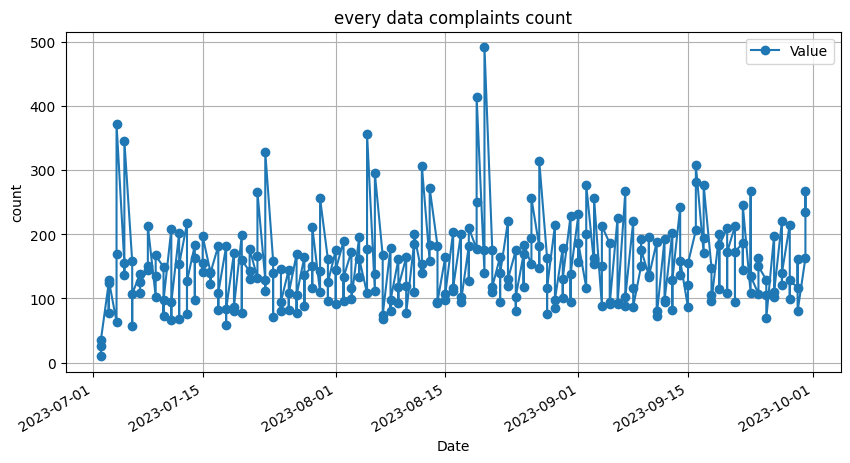

In [171]:
res_v_1['t'] = pd.to_datetime(res_v_1['t'])

plt.figure(figsize=(10, 5))

plt.plot(res_v_1['t'], res_v_1['cnt'], marker='o') 

plt.title('every data complaints count')
plt.xlabel('Date')
plt.ylabel('count')

plt.grid(True)

plt.legend(['Value'])

plt.gcf().autofmt_xdate()

plt.show()

### Visualization 2

In [172]:
visual_query_2 = text('''
SELECT complaint_type, count(*) FROM public.complaints
WHERE incident_zip = 10027
AND created_date::date between  '2023-10-01' AND '2024-09-30'
GROUP BY complaint_type 
ORDER BY count(*) desc
LIMIT 10
''')

In [173]:
with engine.connect() as conn:
    res_v_2 = conn.execute(visual_query_2)
res_v_2 = pd.DataFrame(res_v_2.fetchall())

In [174]:
res_v_2

,complaint_type,count
0,HEAT/HOT WATER,1057
1,Noise - Residential,1020
2,Illegal Parking,411
3,Noise - Street/Sidewalk,374
4,UNSANITARY CONDITION,296
5,PLUMBING,196
6,PAINT/PLASTER,195
7,Noise - Commercial,189
8,DOOR/WINDOW,142
9,GENERAL,139


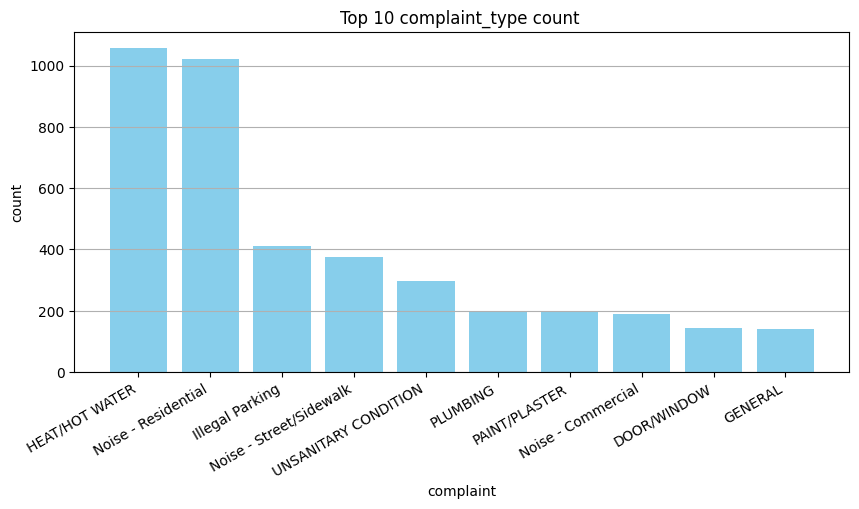

In [175]:
# figure size
plt.figure(figsize=(10, 5))

plt.bar(res_v_2['complaint_type'], res_v_2['count'], color='skyblue') 

# set title
plt.title('Top 10 complaint_type count ')
plt.xlabel('complaint')
plt.ylabel('count')

plt.grid(True, axis='y')  

plt.gcf().autofmt_xdate()

plt.show()

### Visualization 3

In [ ]:
query_viz3 = text('''
SELECT
    z.ZIPCODE,
    AVG(r.rent) AS average_rent,
    COUNT(t.tree_id) AS tree_count,
    COUNT(c.unique_key) AS complaint_count
FROM
    zip_code z
LEFT JOIN
    rent r ON z.ZIPCODE = r.RegionName
LEFT JOIN
    tree t ON z.ZIPCODE = t.zipcode
LEFT JOIN
    complaints c ON z.ZIPCODE = c.incident_zip
WHERE
    r.date >= '2015-01-01' AND r.date < '2023-10-01'
GROUP BY
    z.ZIPCODE;
''')

with engine.connect() as conn:
    result = conn.execute(query_viz3)
rent_trees_complaints_data = pd.DataFrame(result.fetchall(), columns=['ZIPCODE', 'average_rent', 'tree_count', 'complaint_count'])

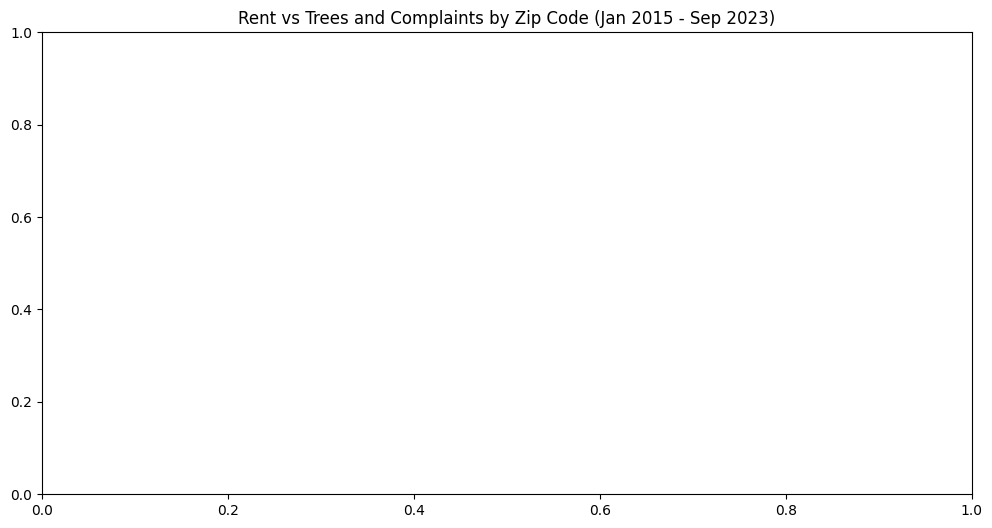

In [220]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=rent_trees_complaints_data, x='average_rent', y='tree_count', ax=ax1, color='blue', label='Trees')
ax1.set_xlabel('Average Rent')
ax1.set_ylabel('Number of Trees')

ax2 = ax1.twinx()
sns.scatterplot(data=rent_trees_complaints_data, x='average_rent', y='complaint_count', ax=ax2, color='red', label='Complaints')
ax2.set_ylabel('Number of Complaints')

plt.title('Rent vs Trees and Complaints by Zip Code (Jan 2015 - Sep 2023)')
plt.show()

### Visualization 4

In [177]:
x_query = text('''
SELECT avg(rent) FROM rent
WHERE substring(date FROM 1 FOR 7) = '2023-09'
             ''')

In [178]:
with engine.connect() as conn:
    res_x = conn.execute(x_query)
res_x = pd.DataFrame(res_x.fetchall())
res_x

,avg
0,2060.278202


In [179]:
y_query = text('''
SELECT incident_zip,count(*) FROM public.complaints
WHERE created_date::date between  '2023-10-01' AND '2024-09-30'
GROUP BY incident_zip
''')

In [180]:
with engine.connect() as conn:
    res_y = conn.execute(y_query)
res_y = pd.DataFrame(res_y.fetchall())
res_y

,incident_zip,count
0,-1,8259
1,83,1
2,6820,1
3,7054,1
4,7080,1
...,...,...
265,78758,1
266,84020,1
267,84101,1
268,92108,1


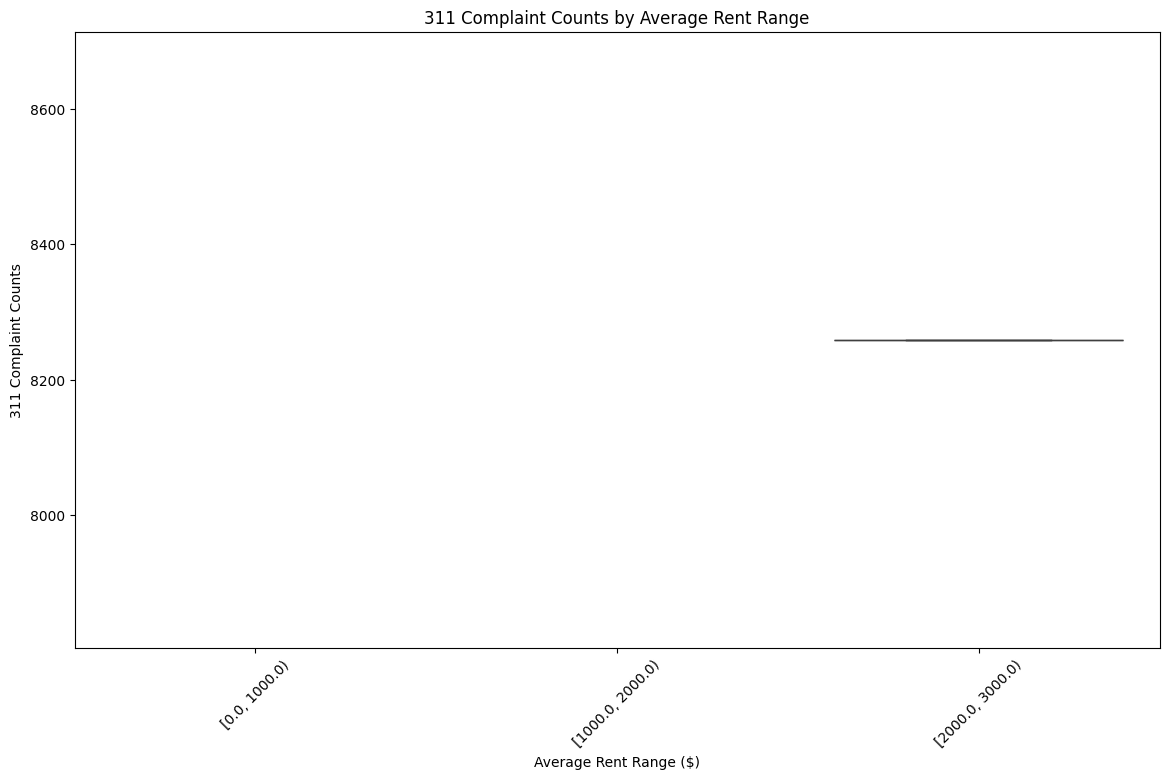

In [181]:
import seaborn as sns
import numpy as np
bins = np.arange(0, res_x['avg'].max() + 1000, 1000)
res_x['rent_range'] = pd.cut(res_x['avg'], bins=bins, include_lowest=True, right=False)
merged_data = pd.concat([res_x.reset_index(drop=True), res_y.reset_index(drop=True)], axis=1)

plt.figure(figsize=(14, 8))
sns.boxplot(x='rent_range', y='count', data=merged_data)

# set title
plt.title('311 Complaint Counts by Average Rent Range')
plt.xlabel('Average Rent Range ($)')
plt.ylabel('311 Complaint Counts')

plt.xticks(rotation=45)

plt.show()

### Visualization 5

In [206]:
query_viz5 = text('''
SELECT
    latitude,
    longitude
FROM
    complaints
WHERE
    created_date >= '2023-01-01' AND created_date <= '2023-09-30'
    AND ST_DWithin(
        ST_SetSRID(ST_MakePoint(-73.96253174434912, 40.80737875669467), 4326)::geography,
        complaints.geom::geography,
        1000
    );
''')

with engine.connect() as conn:
    result = conn.execute(query_viz5)
viz5_data = pd.DataFrame(result.fetchall(), columns=['latitude', 'longitude'])

/var/folders/pb/w5xn2hgx023b9styrfksz59r0000gn/T/ipykernel_20710/4250826379.py:10: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_viz5.plot(ax=ax, marker='o', color='red', markersize=5)


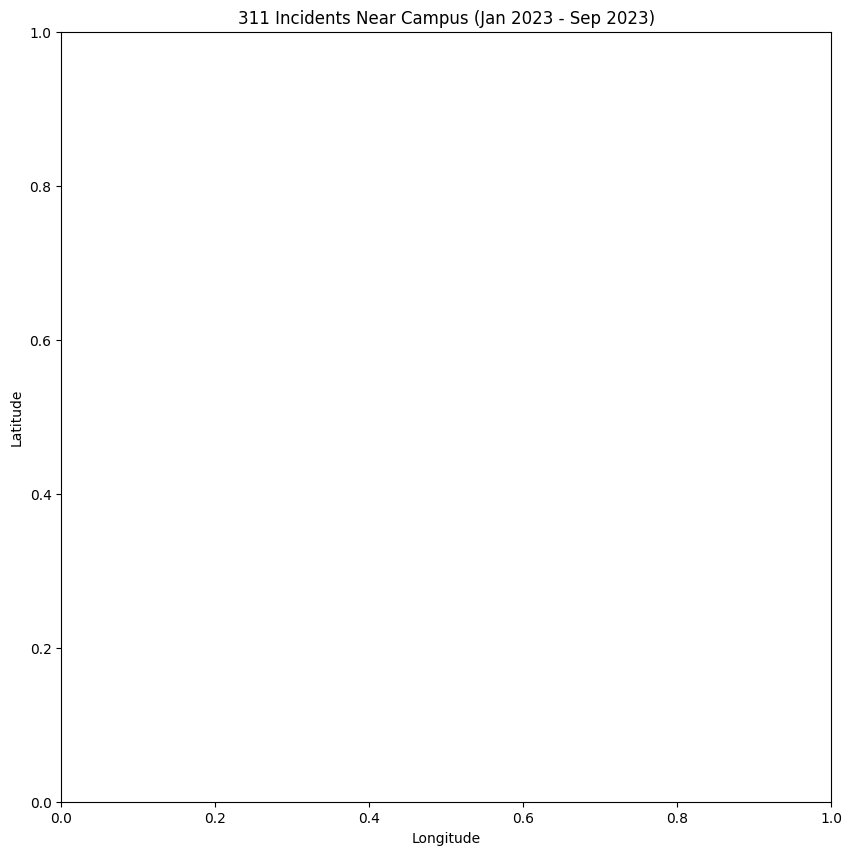

In [207]:
# Create a geospatial plot for Visualization 5
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the latitude and longitude data
gdf_viz5 = gpd.GeoDataFrame(viz5_data, geometry=gpd.points_from_xy(viz5_data.longitude, viz5_data.latitude))

# Plot the 311 incidents on a map
fig, ax = plt.subplots(figsize=(10, 10))
gdf_viz5.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('311 Incidents Near Campus (Jan 2023 - Sep 2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Visualization 6

In [212]:
query_viz6 = text('''
SELECT
    t.geom
FROM
    tree t
WHERE
    t.created_at >= '2018-10-01' AND t.created_at <= '2023-09-30'
UNION
SELECT
    c.geom
FROM
    complaints c
WHERE
    c.created_date >= '2018-10-01' AND c.created_date <= '2023-09-30'
    AND c.complaint_type = 'New Tree Request';
''')

with engine.connect() as conn:
    result = conn.execute(query_viz6)
viz6_data = pd.DataFrame(result.fetchall(), columns=['coor'])

In [ ]:
# Create a geospatial plot for Visualization 6
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the latitude and longitude data
gdf_viz6 = gpd.GeoDataFrame(viz6_data, geometry=gpd.points_from_xy(viz6_data.coor, viz6_data.coor))

# Plot the trees and new tree requests on a map
fig, ax = plt.subplots(figsize=(10, 10))
gdf_viz6[gdf_viz6['complaint_latitude'].notnull()].plot(ax=ax, marker='o', color='green', markersize=5, label='Trees')
gdf_viz6[gdf_viz6['complaint_latitude'].isnull()].plot(ax=ax, marker='x', color='blue', markersize=5, label='New Tree Requests')
plt.legend()
plt.title('Trees and New Tree Requests in NYC (Oct 2018 - Sep 2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()